# Aprendizagem Automática Avançada
## Assigment 4
### Luís Ferreirinha Nº51127
### Christopher Anaya Nª60566

## Problem 2

In [67]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

### a) construct the model assuming all parameters known

In [23]:
rolls = np.array([[int(x) - 1] for x in "664153216162115234653214356634261655234232315142464156663246"])
# states: 1 - loaded, 0 - fair
dice = np.array([[1 if x == "L" else 0] for x in "LLLLLLLLLLLLLLFFFFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFLLLLLLLL"])
rolls

array([[5],
       [5],
       [3],
       [0],
       [4],
       [2],
       [1],
       [0],
       [5],
       [0],
       [5],
       [1],
       [0],
       [0],
       [4],
       [1],
       [2],
       [3],
       [5],
       [4],
       [2],
       [1],
       [0],
       [3],
       [2],
       [4],
       [5],
       [5],
       [2],
       [3],
       [1],
       [5],
       [0],
       [5],
       [4],
       [4],
       [1],
       [2],
       [3],
       [1],
       [2],
       [1],
       [2],
       [0],
       [4],
       [0],
       [3],
       [1],
       [3],
       [5],
       [3],
       [0],
       [4],
       [5],
       [5],
       [5],
       [2],
       [1],
       [3],
       [5]])

In [25]:
casino_model = hmm.CategoricalHMM(n_components=2)
casino_model.n_features = 6
casino_model.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
casino_model.transmat_ = np.array([[0.95, 0.05],
                                   [0.1, 0.90]])
casino_model.emissionprob_ = np.array([[(1/6),(1/6),(1/6),(1/6),(1/6),(1/6)],
                                       [(1/10),(1/10),(1/10),(1/10),(1/10),(5/10)]])
casino_model.score(rolls[-10:])

-16.98461390418157

### b)

In [55]:
Xtrain = rolls[:-10]
Xvalidate = rolls[-10:]
runs = 50
best_score = best_model = None
for i in range(runs):
    casino_model_b = hmm.CategoricalHMM(n_components=2, init_params='t',n_iter=1000, tol=0.001)
    casino_model_b.n_features = 6
    casino_model_b.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
    casino_model_b.emissionprob_ = np.array([[(1/6),(1/6),(1/6),(1/6),(1/6),(1/6)],
                                       [(1/10),(1/10),(1/10),(1/10),(1/10),(5/10)]])
    casino_model_b.fit(Xtrain)
    score = casino_model_b.score(Xvalidate)
    if best_score is None or score > best_score:
        best_score = score
        best_model = casino_model_b

In [57]:
best_model.transmat_

array([[0.08581278, 0.91418722],
       [0.99175983, 0.00824017]])

/tmp/ipykernel_19764/318103204.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


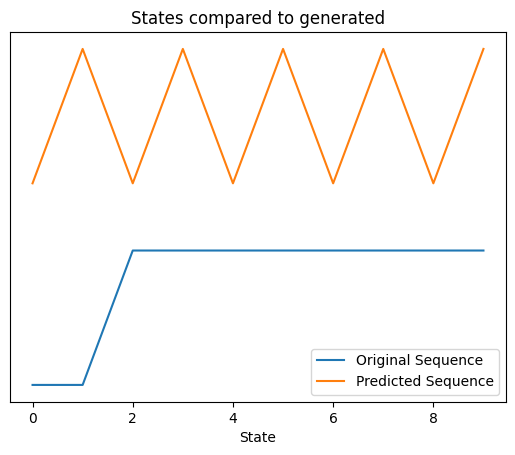

In [77]:
states = best_model.predict(rolls[-10:])

fig, ax = plt.subplots()
ax.plot(dice[-10:], label='Original Sequence')
ax.plot(states + 1.5, label='Predicted Sequence')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

### c)

In [89]:
with open("rolls.txt",'r') as infile:
    dataset = infile.readlines()
    X = [[int(i)-1] for i in dataset]

with open("dice.txt","r") as infile:
    dataset = infile.readlines()
    Y = [[1 if i == "L" else 0] for i in dataset]

XTrain = X[int(-len(X)/2):]
XValidate = X[:int(-len(X)/2)]